# _Why can't YouTubers keep their comments to themselves?_

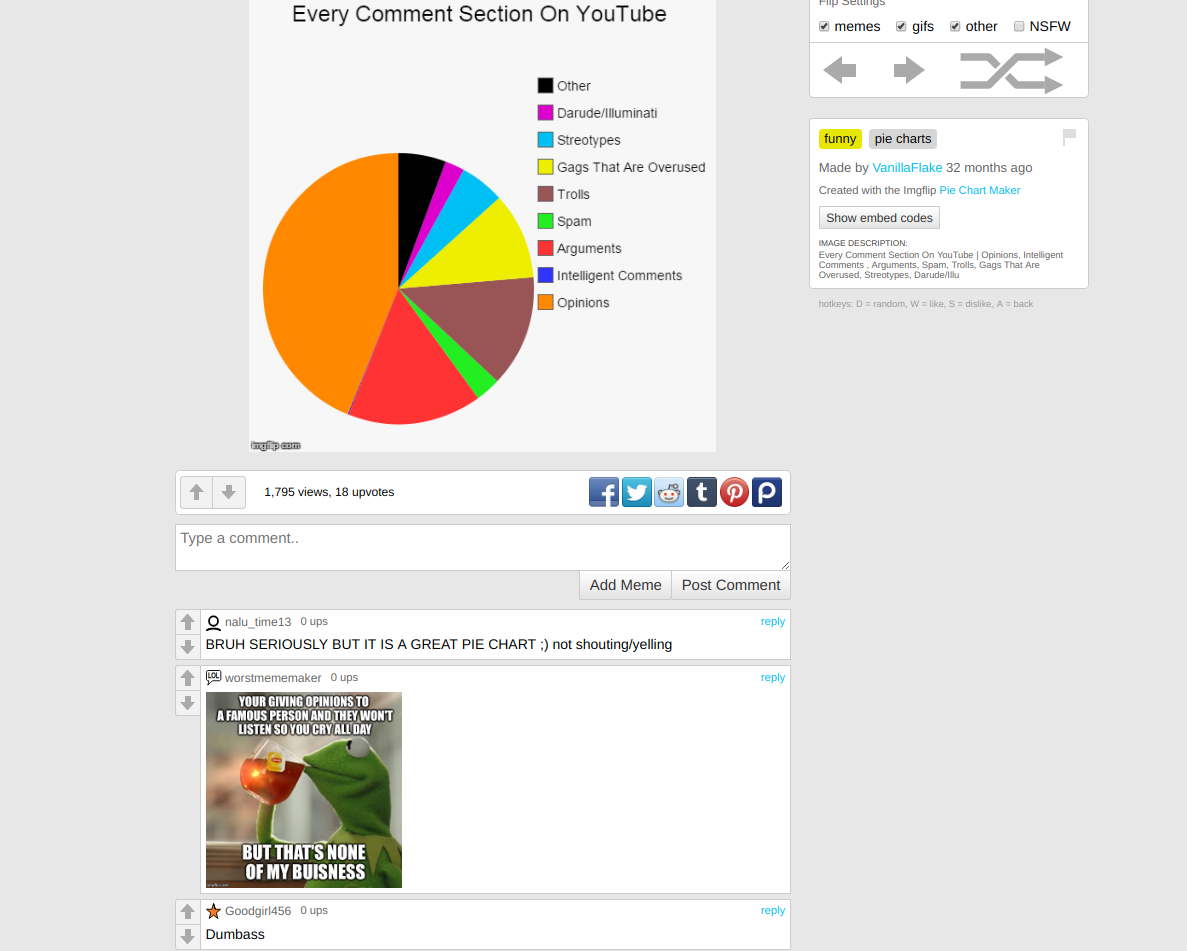

_Image courtesy : https://imgflip.com/i/huww8_

#### _Or for that matter ANYONE on the internet?_

 Well firstly, why not?, when freedom of speech lets you express admiration, loathing, love, hate, affection, dislike, amusement, disdain, surprise, disgust, agreement, disagreement, indifference, ambivalance, and a whole host of other un-classifiable sentiments such as "Praise to KEK!" and "Death to Kale!".
 
 Secondly, a large portion of YouTube's popularity could very well be the doing of its Chat-room like comment section, which has likely started countless wars amongst otherwise peaceful humans. Although the platform is mainly portrayed as an online video sharing website, it has been one of the leading contenders in social meida to have popularised the phrase "I just came here for the comments".

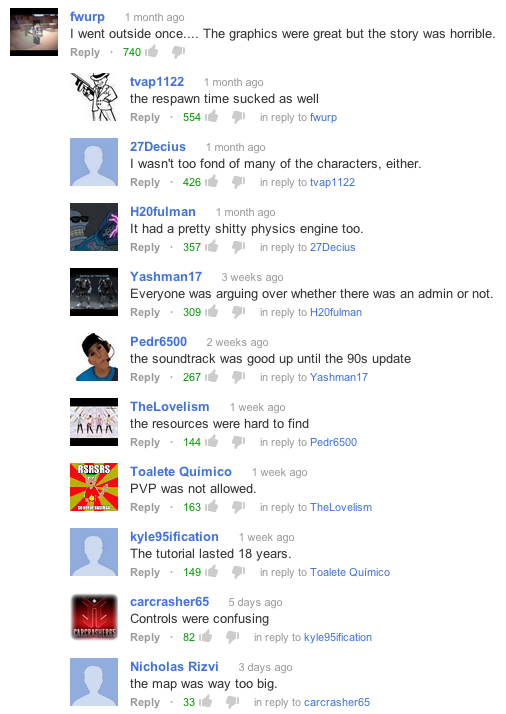
_Image courtesy : www.knowyourmeme.com _

 Thirdly, it's a great place to advertise stuff. Placing a URL to a website on a high traffic website might just get you some attention too. In 2013, a blog post addressed this issue of Google's new policy on YouTube's rising incidents of spam : https://www.grahamcluley.com/youtube-comment-spam-rise/
 
 YouTube's current policy to deal with spam involves the viewer's opinions to detect and remove spam. If a comment is marked as spam enough number of times, the comment is removed. This involves statistical calculation of what is percieved to be offensive or inappropriate by the community of viewers.

## _How to remove the noise?_

 If the above meme described your YouTube channel, you wouldn't know what to think of its performance in the outside world. "Does my channel reach people? Is my channel ranking well on the YouTube charts? Do viewers like my videos? What kind of traffic am I getting?"

 A large set of comments may not always mean high popularity, so filering out comments into one of HAM (relevant) and SPAM (irrelevant) categories can help narrow down the the analysis towards performance of your channel. 

In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

The data set I am using to test my classifier module is a collection of Youtube comments marked as 1 for SPAM and 0 for HAM. Comments have been aggregated into '.cvs' files for each video that they were picked from. You can download the data from : https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection .

The data contains rows of comments detailing the author's name, comment ID, and date and time that comment was posted. The following dataframe is a consolidated version of comments from the five videos. It has 1956 tuples, of which 1005 (51%) have been classified as spam.

In [2]:
path = r'YoutubeData/' # use your path
allFiles = glob.glob(path + "/*.csv")

frame = pd.DataFrame()

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

In [3]:
frame.head()
#frame.xs(0)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


# _What does this data represent?_

To make some plots, we need to organize the data by its indices.

In [4]:
frame['Index'] = range(0, len(frame))
frame = frame.set_index('Index')
New = frame.copy()
New = New.sample( frac =1, random_state = 5)      

New = New.iloc[np.random.permutation(len(New))]
New = New.reset_index()
del New['Index']

We will use this ordered and shuffled data frame 'New' to deal with cleaning up and classification of comments.

In [5]:
from dateutil import parser
from wordcloud import WordCloud

In [6]:
DT = pd.DataFrame(New[New.DATE.notnull()])
DT = DT.reset_index(drop = True)
DT['new_col'] = DT.DATE.apply(lambda x : parser.parse(x))
DT['date'] = [d.date() for d in DT.new_col]
DT['time'] = [d.time() for d in DT.new_col]

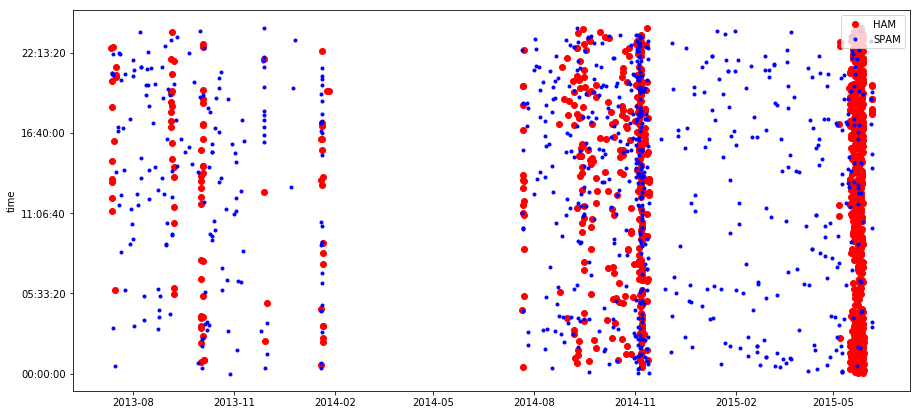

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
ax.plot(DT.date[DT.CLASS == 0], DT.time[DT.CLASS == 0], 'ro', label = 'HAM')
ax.plot(DT.date[DT.CLASS == 1], DT.time[DT.CLASS == 1], 'b.', label = 'SPAM')
ax.legend(loc="upper right")

#plt.xlim('2015-05', '2015-07')                                              #uncomment to zoom in on 2 months

#### NOTE: 
The data set comprises of comments from years 2013 to 2016, while the actual release dates of these videos is around 2010-2013.

In [8]:
d = { 'name' : ['PSY_GANGNAM', 'KATY_ROAR', 'LMFAO_PARTY', 'EMINEM_LOVELIE', 'SHAKIRA_WAKA'], 'views' : [2951311450,2269849627,1348417123,1393162453,1542731300],'release' : ['2012-07-15','2013-09-05','2011-03-08','2010-08-05','2010-06-04']}
d = pd.DataFrame(d)
d

,name,release,views
0,PSY_GANGNAM,2012-07-15,2951311450
1,KATY_ROAR,2013-09-05,2269849627
2,LMFAO_PARTY,2011-03-08,1348417123
3,EMINEM_LOVELIE,2010-08-05,1393162453
4,SHAKIRA_WAKA,2010-06-04,1542731300


The HAM comments seem to be clustered around a  certain period of time while SPAM comments have more variance around particular dates. However, closer examination of the data shows that this may not be a trend. The data set seems to have been chosen with some bias against conversations and discussions which are abundant on popular YouTube videos.

This data set represents comments expressing like / dislike for the video (HAM), or some form of advertisement (SPAM). This data may not be truly representative of all comments found on YouTube.

Also, Date-Time stamps are not a strong feature that can be used for classification.

In [9]:
spamwords = ' '.join(list(New.CONTENT[New.CLASS == 1]))
spamcloud = WordCloud(background_color = 'white').generate(spamwords)
hamwords = ' '.join(list(New.CONTENT[New.CLASS == 0]))
hamcloud =  WordCloud(background_color = 'white').generate(hamwords)

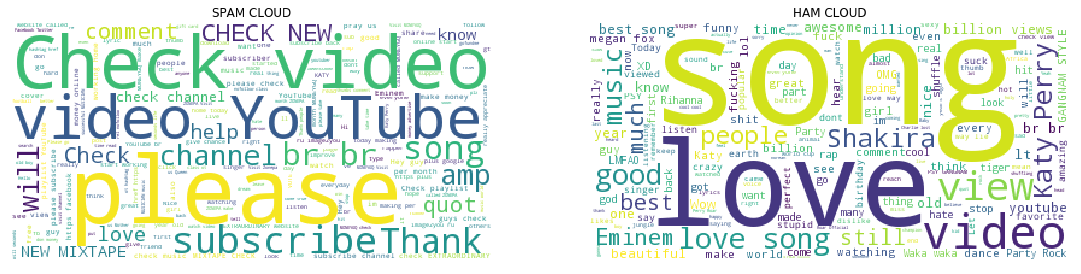

In [10]:
figure, (ax1, ax2) = plt.subplots( nrows = 1, ncols = 2, figsize = (19, 15))
ax1.imshow(spamcloud)
ax1.set_title("SPAM CLOUD")
ax2.imshow(hamcloud)
ax2.set_title("HAM CLOUD")
for item in (ax1, ax2) :
    item.set_xticks([])
    item.set_yticks([])
    item.axis('off')

The following is a plot between features extracted from the stemmed comments and the normalizer weights of each feature. The plot is a visualisation of which words the module trusts the most for classification.

In [33]:
train_data = New.iloc[TRAIN]['CONTENT'].values
train_data = [" ".join([porter.stem(word) for word in sentence.split(" ")]) for sentence in train_data]
spam_in_train = (New.iloc[TRAIN]['CLASS'] == 1)
    
vectorizer = sfe.TfidfVectorizer()
train_matrix = vectorizer.fit_transform(train_data)

forest = RandomForestClassifier()
forest.fit(train_matrix, spam_in_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0) 
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

rank = []
feature = []
for f in range(train_matrix.shape[1]):
    rank.append(indices[f])
    feature.append(importances[indices[f]])          
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 779 (0.088906)
2. feature 2382 (0.060397)
3. feature 2233 (0.056191)
4. feature 3038 (0.039592)
5. feature 3538 (0.035680)
6. feature 840 (0.035462)
7. feature 767 (0.031759)
8. feature 3173 (0.025490)
9. feature 2488 (0.022182)
10. feature 2353 (0.019263)
11. feature 3039 (0.014809)
12. feature 2092 (0.014482)
13. feature 2019 (0.013307)
14. feature 3355 (0.013168)
15. feature 1678 (0.012245)
16. feature 3204 (0.012051)
17. feature 1708 (0.011749)
18. feature 3574 (0.011525)
19. feature 3151 (0.011366)
20. feature 437 (0.009887)
21. feature 1794 (0.008785)
22. feature 2928 (0.008050)
23. feature 3156 (0.007902)
24. feature 610 (0.007143)
25. feature 494 (0.006975)
26. feature 1377 (0.006651)
27. feature 2824 (0.006395)
28. feature 2185 (0.005596)
29. feature 1961 (0.005581)
30. feature 2380 (0.005423)
31. feature 1798 (0.005077)
32. feature 1077 (0.005009)
33. feature 182 (0.004684)
34. feature 2490 (0.004620)
35. feature 354 (0.004496)
36. feature 1274 (0.

1490. feature 1000 (0.000000)
1491. feature 999 (0.000000)
1492. feature 998 (0.000000)
1493. feature 997 (0.000000)
1494. feature 996 (0.000000)
1495. feature 995 (0.000000)
1496. feature 994 (0.000000)
1497. feature 993 (0.000000)
1498. feature 992 (0.000000)
1499. feature 991 (0.000000)
1500. feature 990 (0.000000)
1501. feature 989 (0.000000)
1502. feature 988 (0.000000)
1503. feature 3299 (0.000000)
1504. feature 1004 (0.000000)
1505. feature 1006 (0.000000)
1506. feature 1026 (0.000000)
1507. feature 3397 (0.000000)
1508. feature 1025 (0.000000)
1509. feature 1023 (0.000000)
1510. feature 1022 (0.000000)
1511. feature 1021 (0.000000)
1512. feature 1020 (0.000000)
1513. feature 1019 (0.000000)
1514. feature 1018 (0.000000)
1515. feature 1017 (0.000000)
1516. feature 1016 (0.000000)
1517. feature 1015 (0.000000)
1518. feature 1014 (0.000000)
1519. feature 1013 (0.000000)
1520. feature 1012 (0.000000)
1521. feature 1011 (0.000000)
1522. feature 1010 (0.000000)
1523. feature 1009 (0.

2617. feature 2744 (0.000000)
2618. feature 2598 (0.000000)
2619. feature 2597 (0.000000)
2620. feature 2745 (0.000000)
2621. feature 2595 (0.000000)
2622. feature 2594 (0.000000)
2623. feature 2593 (0.000000)
2624. feature 2592 (0.000000)
2625. feature 2746 (0.000000)
2626. feature 2590 (0.000000)
2627. feature 2589 (0.000000)
2628. feature 2588 (0.000000)
2629. feature 2747 (0.000000)
2630. feature 2604 (0.000000)
2631. feature 2606 (0.000000)
2632. feature 2584 (0.000000)
2633. feature 2607 (0.000000)
2634. feature 2739 (0.000000)
2635. feature 2624 (0.000000)
2636. feature 2623 (0.000000)
2637. feature 2622 (0.000000)
2638. feature 2740 (0.000000)
2639. feature 2620 (0.000000)
2640. feature 2619 (0.000000)
2641. feature 2618 (0.000000)
2642. feature 2617 (0.000000)
2643. feature 2616 (0.000000)
2644. feature 2615 (0.000000)
2645. feature 2741 (0.000000)
2646. feature 2742 (0.000000)
2647. feature 2611 (0.000000)
2648. feature 2610 (0.000000)
2649. feature 2609 (0.000000)
2650. feat

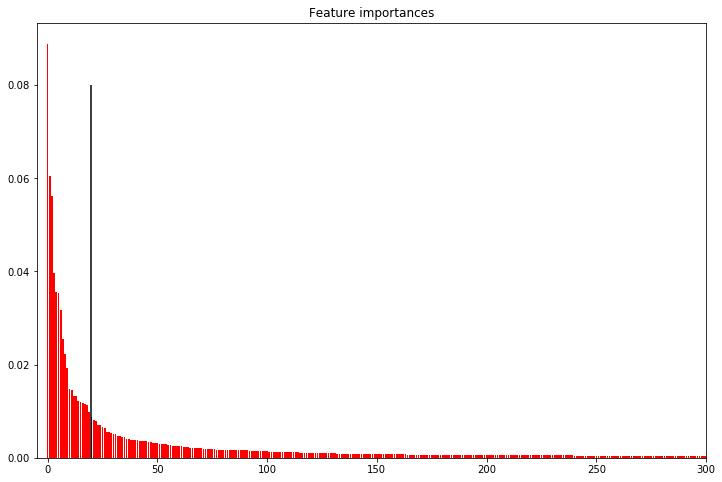

In [34]:
# Plot the feature importances of the forest
plt.figure(figsize = (12, 8))
plt.title("Feature importances")
plt.bar(range(train_matrix.shape[1]), importances[indices], color="r", align="center")
#plt.xticks(range(X.shape[1]), indices)
plt.xlim(-5, 300)
plt.vlines(20, ymin = 0, ymax = 0.08)
plt.show()

In [35]:
for index in rank[0:20] :
        print(vectorizer.get_feature_names()[index])

check
out
my
subscrib
www
com
channel
thi
pleas
on
subscribe
me
love
video
http
to
if
youtube
thank
and


The plot clearly shows that few words (16 precisely) of the 3667 text features are heavily deterministic when it comes to classification, and those same words (as extracted above) very obviously would appear in a typical spam comment.

To text classification is the way to go!